Question 3 - Bible
First I will import modules and the CSV bible data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import seaborn as sns
sns.set()

bible = pd.read_csv("C:\Users\heid4253\Documents\Project2Data\ASV_Books.csv")

In [ ]:
#!pip install seaborn==0.9.0

In [21]:
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns',None)
bible.head(50)

,Unnamed: 0,Books,Testaments,Sections,text
0,1,gen,OT,Law,In the beginning God created the heavens and t...
1,2,exod,OT,Law,"Now these are the names of the sons of Israel,..."
2,3,lev,OT,Law,"And Jehovah called unto Moses, and spake unto ..."
3,4,num,OT,Law,And Jehovah spake unto Moses in the wilderness...
4,5,deut,OT,Law,These are the words which Moses spake unto all...
5,6,josh,OT,History,Now it came to pass after the death of Moses t...
6,7,judg,OT,History,"And it came to pass after the death of Joshua,..."
7,8,ruth,OT,History,And it came to pass in the days when the judge...
8,9,1sam,OT,History,Now there was a certain man of Ramathaim-zophi...
9,10,2sam,OT,History,"And it came to pass after the death of Saul, w..."


In [5]:
bible['Sections'].unique()

array(['Law', 'History', 'Wisdom', 'Prophets', 'Gospels', 'Paul',
       'Apostles'], dtype=object)

#### A. What is the optimal number of clusters of these 66 Books? Find these clusters and describe them. Are you surprised at your finding? Why/Why not? Graph and color your clusters (probably on the first two PC's). On the graph, show your clusters in colors, the Testaments in plot symbols, and the Sections in sizes.

There are 7 unique sections.
I will create a new dataframe with just the text, dropping the columns with the book labels.

In [2]:
biblet=bible[['text']]
biblet

,text
0,In the beginning God created the heavens and t...
1,"Now these are the names of the sons of Israel,..."
2,"And Jehovah called unto Moses, and spake unto ..."
3,And Jehovah spake unto Moses in the wilderness...
4,These are the words which Moses spake unto all...
5,Now it came to pass after the death of Moses t...
6,"And it came to pass after the death of Joshua,..."
7,And it came to pass in the days when the judge...
8,Now there was a certain man of Ramathaim-zophi...
9,"And it came to pass after the death of Saul, w..."


I will use term frequency-inverse document frequency on the text, removing stop words and numbers.

In [4]:
from sklearn.feature_extraction import text 

stop_words = text.ENGLISH_STOP_WORDS.union('s','o','did') #'s'['god','men','come','unto','shall']

In [8]:
print(stop_words)

frozenset(['all', 'show', 'anyway', 'fifty', 'four', 'go', 'mill', 'find', 'seemed', 'whose', 're', 'herself', 'whoever', 'behind', 'should', 'to', 'only', 'under', 'herein', 'do', 'his', 'get', 'very', 'de', 'myself', 'cannot', 'every', 'yourselves', 'him', 'is', 'cry', 'beforehand', 'these', 'she', 'where', 'the', 'ten', 'thin', 'eleven', 'd', 'namely', 'besides', 'are', 'further', 'even', 'what', 'please', 'its', 'couldnt', 'enough', 'above', 'between', 'neither', 'ever', 'across', 'can', 'we', 'full', 'never', 'however', 'here', 'others', 'alone', 'along', 'fifteen', 'both', 'last', 'many', 'whereafter', 'wherever', 'against', 'etc', 'amount', 'became', 'whole', 'otherwise', 'among', 'via', 'co', 'afterwards', 'seems', 'whatever', 'put', 'moreover', 'throughout', 'yourself', 'from', 'would', 'two', 'been', 'next', 'whom', 'much', 'call', 'therefore', 'interest', 'themselves', 'thru', 'until', 'empty', 'more', 'fire', 'latterly', 'hereby', 'else', 'everywhere', 'hers', 'former', 'th

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = TfidfVectorizer(stop_words=stop_words,token_pattern=r'(?u)\b[A-Za-z]+\b', ngram_range=(1,4), max_features=50000) #, max_features=10000 ,ngram_range=(1,3),max_df=3
x=vect.fit_transform(biblet.text)

In [10]:
x

<66x50000 sparse matrix of type '<type 'numpy.float64'>'
	with 189291 stored elements in Compressed Sparse Row format>

In [11]:
x.shape

(66, 50000)

I will create a new dataframe from the TFIDF vectorized words

In [12]:
biblex=pd.DataFrame(x.toarray(), columns=vect.get_feature_names())
biblex.head()

,aaron,aaron brought,aaron came,aaron congregation,aaron did,aaron died,aaron garments,aaron garments sons,aaron hur,aaron jehovah,...,zobah david,zohar,zophar,zophar naamathite,zorah,zorah eshtaol,zuar,zuph,zur,zurishaddai
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.006523,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
1,0.138997,0.002075,0.006224,0.000000,0.012448,0.000000,0.003859,0.002075,0.006839,0.004149,...,0.0,0.002075,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
2,0.097280,0.000000,0.000000,0.000000,0.000000,0.000000,0.003916,0.004211,0.000000,0.002105,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,0.111875,0.000000,0.001918,0.006322,0.001918,0.001783,0.003567,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.010536,0.0,0.003188,0.010536
4,0.004149,0.000000,0.000000,0.000000,0.000000,0.001670,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


Find optimal n_clusters for Kmeans. Test 2 thru 15 using Silhouette score to find the optimal.

The optimal number of clusters is 2


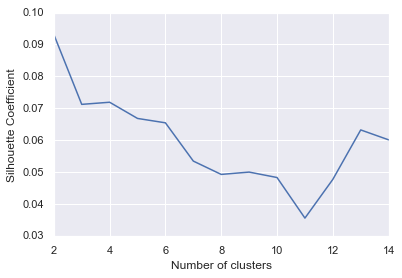

In [12]:
from sklearn import metrics
from sklearn.cluster import KMeans

k_range = range(2, 15)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(biblex)
    scores.append(metrics.silhouette_score(biblex, km.labels_))

optimal_k = k_range[scores.index(max(scores))]
print "The optimal number of clusters is %d" % optimal_k    
    
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True) 

In [13]:
testkmeans=KMeans(n_clusters=2, random_state=1).fit(biblex)
testkmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Tfidf Vectorizer was able to cluster the bible texts perfectly into the New and the Old Testament

In [14]:
bible['ClusterTestament']=testkmeans.labels_
pd.crosstab(bible.ClusterTestament,bible.Testaments,margins=True)

Testaments,NT,OT,All
ClusterTestament,,,
0,0,39,39
1,27,0,27
All,27,39,66


Let's see how 7 clusters will perform according to the 7 sections.

In [15]:
kmeans=KMeans(n_clusters=7, random_state=1).fit(biblex)
kmeans.labels_

array([5, 1, 1, 1, 4, 1, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4,
       4, 3, 4, 4, 2, 4, 3, 3, 3, 4, 4, 4, 4, 3, 3, 3, 3, 5, 5, 5, 5, 5,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 6, 0, 0, 0, 0, 0, 0, 4, 0, 5])

In [16]:
bible['ClusterK']=kmeans.labels_
pd.crosstab(bible.ClusterK,bible.Sections,margins=True)

Sections,Apostles,Gospels,History,Law,Paul,Prophets,Wisdom,All
ClusterK,,,,,,,,
0,7,0,0,0,11,0,0,18
1,0,0,1,3,0,0,0,4
2,0,0,10,0,0,1,0,11
3,0,0,0,0,0,8,0,8
4,1,0,1,1,0,8,5,16
5,1,5,0,1,0,0,0,7
6,0,0,0,0,2,0,0,2
All,9,5,12,5,13,17,5,66


The clustering of sections on the bible text did not fit sections uniquely. There is a lot of overlap. Although majority of the books were grouped together.

I will run a Principle Components Analysis on the bible text. First I will see how many components are needed to get majority of the explained variance.

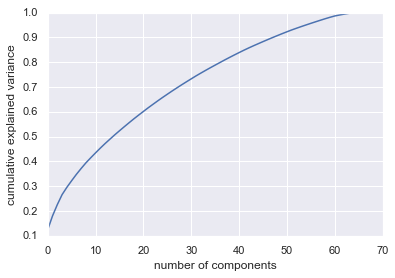

In [17]:
from sklearn.decomposition import PCA
pca = PCA().fit(biblex)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Sixty components gets roughly 100% of the explained variance. I will use 60 components.

In [18]:
pca = PCA(n_components=60)
pca.fit(biblex)
print(pca.components_)
print(pca.explained_variance_ratio_)

[[-1.88107071e-02 -2.95938539e-04 -4.00932941e-04 ... -3.16804751e-04
  -9.35457940e-04 -4.60857731e-04]
 [ 6.53689327e-04  4.91410349e-04  6.85416088e-06 ...  9.50605328e-04
   2.59935900e-03  5.34013267e-05]
 [ 3.82602038e-03 -5.67819717e-05  2.92278783e-04 ... -7.18791697e-04
  -2.74345870e-03 -8.28903870e-05]
 ...
 [-2.18085025e-02 -1.44302122e-03 -1.72611667e-03 ... -6.39676427e-04
   7.48221705e-04  1.01389549e-04]
 [-4.63350301e-02 -2.20103763e-04 -2.12021036e-03 ...  7.20080858e-04
   5.15397860e-04  8.34611128e-03]
 [-3.48436446e-02 -2.23203033e-04 -1.95008961e-03 ...  3.32256368e-04
   1.32823879e-04  4.80709066e-03]]
[0.12488786 0.05518782 0.04541152 0.0403698  0.02954585 0.02670541
 0.0257824  0.02380357 0.0226923  0.02028332 0.01967684 0.01921802
 0.01840212 0.01748118 0.01732833 0.01658709 0.01627269 0.01598019
 0.01574966 0.01508531 0.01481537 0.01468553 0.01405787 0.01394009
 0.013572   0.01311554 0.0130068  0.01263012 0.01243715 0.01209121
 0.01192084 0.01184328 0.0112

In [28]:
n_components=60
pcadf=pd.DataFrame(pca.transform(biblex), columns=['PCA%i' % i for i in range(n_components)], index=biblex.index)

In [29]:
pcadf.head()

,PCA0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,...,PCA50,PCA51,PCA52,PCA53,PCA54,PCA55,PCA56,PCA57,PCA58,PCA59
0,-0.185950,0.279816,0.189791,0.043544,-0.033078,0.123046,0.079857,-0.084851,0.011299,-0.036056,...,-0.163993,-0.172853,-0.115609,-0.032159,0.011688,-0.093277,-0.010719,0.038038,0.001782,0.010359
1,-0.317608,-0.001269,0.111963,-0.066625,-0.187356,0.070602,0.329986,0.043658,-0.013534,-0.010354,...,0.145826,0.047466,-0.057201,0.121341,-0.009303,0.002437,-0.091309,-0.086823,-0.177742,-0.131058
2,-0.237081,-0.213623,0.112343,-0.172271,-0.127916,-0.155705,0.381809,0.181722,-0.079967,0.019447,...,-0.127626,-0.155018,0.178735,0.004808,0.097615,0.093645,-0.013686,0.053960,-0.147743,-0.063170
3,-0.272728,0.013965,-0.017837,-0.208564,-0.159630,-0.085749,0.489281,0.123922,-0.027951,-0.051566,...,0.031821,0.151068,-0.191892,-0.049293,-0.113743,-0.096959,0.109440,0.002981,0.240788,0.131736
4,-0.311630,-0.117346,0.108362,0.098100,-0.179603,0.168576,0.113259,-0.106450,-0.012932,0.048151,...,0.008408,-0.119529,0.220365,-0.066505,0.026248,0.116996,0.116414,0.048710,0.164994,0.159168


The optimal number of clusters is 2


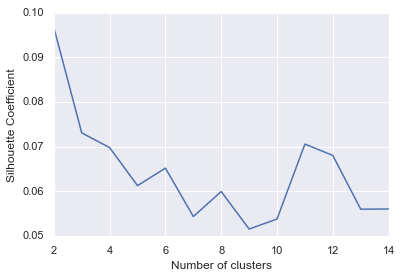

In [21]:
from sklearn import metrics
from sklearn.cluster import KMeans

k_range = range(2, 15)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(pcadf)
    scores.append(metrics.silhouette_score(pcadf, km.labels_))

optimal_k = k_range[scores.index(max(scores))]
print "The optimal number of clusters is %d" % optimal_k    
    
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True) 

In [22]:
kmeans_pca=KMeans(n_clusters=2, random_state=1).fit(pcadf)
kmeans_pca.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
kmeans_pca7=KMeans(n_clusters=7, random_state=1).fit(pcadf)
kmeans_pca7.labels_

array([6, 1, 1, 1, 1, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 1, 1, 1, 1, 1,
       1, 4, 4, 1, 6, 1, 4, 1, 1, 6, 1, 1, 1, 4, 4, 4, 4, 3, 3, 3, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 0, 2, 3])

In [23]:
pcadf['pcaTestCluster']=kmeans_pca.labels_

In [33]:
pcadf['pcaSectCluster']=kmeans_pca7.labels_

In [34]:
bible['Cluster']=kmeans_pca7.labels_

Kmeans was able to cluster the books perfectly in the Old and New Testaments when run on the PCs.

In [36]:
pcadf['Testa']=bible.Testaments
pcadf['Sect']=bible.Sections

Graph of kmeans cluster of 2 testaments on first two PCAs. Labels are found in legend.

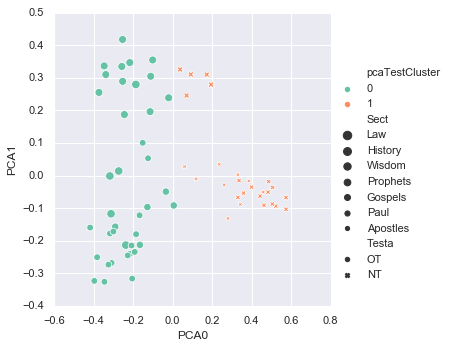

In [26]:
fig2=sns.relplot(x="PCA0", y="PCA1", data=pcadf, hue="pcaTestCluster", size='Sect', style='Testa', legend='full', palette= 'Set2')

Graph of kmeans cluster of 7 sections on first two PCAs. Labels are found in legend.

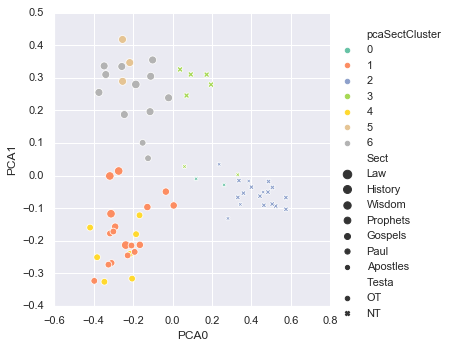

In [38]:
fig3=sns.relplot(x="PCA0", y="PCA1", data=pcadf, hue="pcaSectCluster", size='Sect', style='Testa', legend='full', palette= 'Set2')

I will create a crosstab of my clusters versus the sections to see how well the clustering worked compared to the actual sections

In [39]:
pd.set_option('display.max_columns', None)
pd.crosstab(bible.Cluster,bible.Sections,margins=True)

Sections,Apostles,Gospels,History,Law,Paul,Prophets,Wisdom,All
Cluster,,,,,,,,
0,2,0,0,0,0,0,0,2
1,0,0,0,4,0,8,5,17
2,5,0,0,0,13,0,0,18
3,2,5,0,0,0,0,0,7
4,0,0,0,0,0,7,0,7
5,0,0,3,0,0,0,0,3
6,0,0,9,1,0,2,0,12
All,9,5,12,5,13,17,5,66


The clustering on PCA did an okay job of grouping the sections but there was a lot of overlap, each was not in a unique clustering.

#### B. How would Association Analyses help to reveal characteristic word clusters? Produce word clouds for the top 10 words clusters with the top 100 most frquent words. Describe these word clusters, and what they are telling you about the Bible. How do these top 10 words clouds represent the 2 Testaments and the 7 Sections?

First I will vectorize the text. Then add the Testaments and Sections as columns, and dummy code them.
Then I will have a boolean matrix of top words along with Sections and Testaments which I can run apriori and search frequent itemsets. From there I can see what frequent itemsets are associated with the antecedent of certain sections or testaments.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectboo = CountVectorizer(stop_words=stop_words,token_pattern=r'(?u)\b[A-Za-z]+\b', ngram_range=(1,5), max_features=1000) #, max_features=10000 ,ngram_range=(1,3),max_df=3
xboo=vectboo.fit_transform(biblet.text)

In [6]:
bible5=pd.DataFrame(xboo.toarray(), columns=vectboo.get_feature_names())
bible5.head()

,aaron,abide,abimelech,able,abomination,abominations,abraham,abroad,absalom,abundance,...,ye say,ye shall,yea,year,years,years old,young,young men,youth,zion
0,0,5,24,3,2,0,134,7,0,0,...,2,28,4,10,114,20,11,4,3,0
1,116,1,0,6,2,0,9,6,0,0,...,1,61,2,16,15,4,5,1,0,0
2,80,2,0,5,15,3,1,8,0,0,...,0,131,0,34,24,6,14,0,1,0
3,101,2,0,22,0,0,1,1,0,0,...,0,105,1,52,40,35,24,0,2,0
4,4,1,0,6,12,5,7,4,0,2,...,0,72,3,16,13,2,12,0,0,0


In [7]:
biblets=bible[['Sections','Testaments']]
biblets.head()

,Sections,Testaments
0,Law,OT
1,Law,OT
2,Law,OT
3,Law,OT
4,Law,OT


In [8]:
bibletst=pd.concat([biblets,bible5], axis=1)
bibletst.head()

,Sections,Testaments,aaron,abide,abimelech,able,abomination,abominations,abraham,abroad,...,ye say,ye shall,yea,year,years,years old,young,young men,youth,zion
0,Law,OT,0,5,24,3,2,0,134,7,...,2,28,4,10,114,20,11,4,3,0
1,Law,OT,116,1,0,6,2,0,9,6,...,1,61,2,16,15,4,5,1,0,0
2,Law,OT,80,2,0,5,15,3,1,8,...,0,131,0,34,24,6,14,0,1,0
3,Law,OT,101,2,0,22,0,0,1,1,...,0,105,1,52,40,35,24,0,2,0
4,Law,OT,4,1,0,6,12,5,7,4,...,0,72,3,16,13,2,12,0,0,0


In [9]:
bibledum=pd.get_dummies(bibletst, columns=["Sections","Testaments"])
bibledum.head(1)

,aaron,abide,abimelech,able,abomination,abominations,abraham,abroad,absalom,abundance,...,zion,Sections_Apostles,Sections_Gospels,Sections_History,Sections_Law,Sections_Paul,Sections_Prophets,Sections_Wisdom,Testaments_NT,Testaments_OT
0,0,5,24,3,2,0,134,7,0,0,...,0,0,0,0,1,0,0,0,0,1


Association rules require the data to be in boolean form.  I will tranform the count vectorized into boolean.

In [10]:
bibleboo=bibledum > 0
bibleboo.head()

,aaron,abide,abimelech,able,abomination,abominations,abraham,abroad,absalom,abundance,...,zion,Sections_Apostles,Sections_Gospels,Sections_History,Sections_Law,Sections_Paul,Sections_Prophets,Sections_Wisdom,Testaments_NT,Testaments_OT
0,False,True,True,True,True,False,True,True,False,False,...,False,False,False,False,True,False,False,False,False,True
1,True,True,False,True,True,False,True,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,True,True,False,True,True,True,True,True,False,False,...,False,False,False,False,True,False,False,False,False,True
3,True,True,False,True,False,False,True,True,False,False,...,False,False,False,False,True,False,False,False,False,True
4,True,True,False,True,True,True,True,True,False,True,...,False,False,False,False,True,False,False,False,False,True


In [ ]:
#!pip install mlxtend 
apriori?

Find frequent itemsets (words) with minimum support of 0.015 (1/66) and max length of 2 (to save on computer power).

In [11]:
from mlxtend.frequent_patterns import apriori

freq_bible=apriori(bibleboo, min_support=0.015, max_len=2, use_colnames=True)
freq_bible['length'] = freq_bible['itemsets'].apply(lambda x: len(x))
freq_bible.head()

,support,itemsets,length
0,0.242424,(aaron),1
1,0.484848,(abide),1
2,0.075758,(abimelech),1
3,0.636364,(able),1
4,0.272727,(abomination),1


From the frequent itemsets I can now create association rules.

In [12]:
from mlxtend.frequent_patterns import association_rules

#pd.set_option('display.max_columns', 65)
#pd.set_option('display.max_rows', 200)
rules=association_rules(freq_bible)
#rules.sort_values(['lift'],ascending=False).head(10)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(jehovah spake unto),(thee thou),0.212121,0.590909,0.196970,0.928571,1.571429,0.071625,5.727273
1,(mountain),(things),0.454545,0.909091,0.424242,0.933333,1.026667,0.011019,1.363636
2,(feared),(blood),0.363636,0.621212,0.318182,0.875000,1.408537,0.092287,3.030303
3,(establish),(right hand),0.378788,0.575758,0.318182,0.840000,1.458947,0.100092,2.651515
4,(sent unto),(shall),0.363636,1.000000,0.363636,1.000000,1.000000,0.000000,inf


I can now search the rules where the new testament is the antecendent. The results will be words (or word sets) that are most frequent and supported by the Old Testament

In [17]:
OTrules=rules[ rules['antecedents'] == {'Testaments_OT'} ]
OTrules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
809,(Testaments_OT),(sent),0.590909,0.803030,0.500000,0.846154,1.053701,0.025482,1.280303
1759,(Testaments_OT),(land),0.590909,0.681818,0.575758,0.974359,1.429060,0.172865,12.409091
8227,(Testaments_OT),(away),0.590909,0.863636,0.545455,0.923077,1.068826,0.035124,1.772727
9526,(Testaments_OT),(wine),0.590909,0.651515,0.500000,0.846154,1.298748,0.115014,2.265152
9692,(Testaments_OT),(did),0.590909,0.848485,0.515152,0.871795,1.027473,0.013774,1.181818
12291,(Testaments_OT),(saith),0.590909,0.712121,0.484848,0.820513,1.152209,0.064050,1.603896
14727,(Testaments_OT),(eyes),0.590909,0.757576,0.560606,0.948718,1.252308,0.112948,4.727273
22982,(Testaments_OT),(night),0.590909,0.681818,0.484848,0.820513,1.203419,0.081956,1.772727
24878,(Testaments_OT),(destroy),0.590909,0.636364,0.484848,0.820513,1.289377,0.108815,2.025974
30233,(Testaments_OT),(say),0.590909,0.863636,0.545455,0.923077,1.068826,0.035124,1.772727


And the New Testament.

In [16]:
NTrules=rules[ rules['antecedents'] == {'Testaments_NT'} ]
NTrules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4780,(Testaments_NT),(brother),0.409091,0.787879,0.333333,0.814815,1.034188,0.011019,1.145455
8152,(Testaments_NT),(spirit),0.409091,0.818182,0.378788,0.925926,1.131687,0.044077,2.454545
13662,(Testaments_NT),(lord jesus),0.409091,0.333333,0.333333,0.814815,2.444444,0.196970,3.600000
14933,(Testaments_NT),(life),0.409091,0.742424,0.333333,0.814815,1.097506,0.029614,1.390909
27821,(Testaments_NT),(according),0.409091,0.833333,0.333333,0.814815,0.977778,-0.007576,0.900000
34845,(Testaments_NT),(hath),0.409091,0.969697,0.393939,0.962963,0.993056,-0.002755,0.818182
35971,(Testaments_NT),(jesus),0.409091,0.393939,0.393939,0.962963,2.444444,0.232782,16.363636
39606,(Testaments_NT),(speak),0.409091,0.772727,0.333333,0.814815,1.054466,0.017218,1.227273
42010,(Testaments_NT),(peace),0.409091,0.924242,0.393939,0.962963,1.041894,0.015840,2.045455
48059,(Testaments_NT),(father),0.409091,0.803030,0.393939,0.962963,1.199161,0.065427,5.318182


Looking over the list of words associated with each of the testaments, it's interesting to see the differences.
- The new testament has Jesus, Jesus Christ, Lord, spirit, truth, brother, glory and grace
- The old testament has Israel, Jehovah, King, silver, gold and destroy.

Using the rules I can also look to specific sections. 

I'll look at Apostles. It is definitely in the New Testament, not just because a consequent is Testaments_NT but also because of the words like christ and jesus showing up.

In [32]:
APrules=rules[ rules['antecedents'] == {'Sections_Apostles'} ]
APrules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2064,(Sections_Apostles),(ye),0.136364,0.893939,0.121212,0.888889,0.994350,-0.000689,0.954545
23774,(Sections_Apostles),(Testaments_NT),0.136364,0.409091,0.136364,1.000000,2.444444,0.080579,inf
26892,(Sections_Apostles),(hath),0.136364,0.969697,0.136364,1.000000,1.031250,0.004132,inf
33027,(Sections_Apostles),(father),0.136364,0.803030,0.121212,0.888889,1.106918,0.011708,1.772727
36301,(Sections_Apostles),(flesh),0.136364,0.757576,0.121212,0.888889,1.173333,0.017906,2.181818
61635,(Sections_Apostles),(beloved),0.136364,0.484848,0.121212,0.888889,1.833333,0.055096,4.636364
66924,(Sections_Apostles),(christ),0.136364,0.393939,0.121212,0.888889,2.256410,0.067493,5.454545
70643,(Sections_Apostles),(jesus),0.136364,0.393939,0.121212,0.888889,2.256410,0.067493,5.454545
71887,(Sections_Apostles),(evil),0.136364,0.893939,0.121212,0.888889,0.994350,-0.000689,0.954545
73263,(Sections_Apostles),(things),0.136364,0.909091,0.136364,1.000000,1.100000,0.012397,inf


I will look at Wisdom also. It is definitely in the Old Testament. Words like sword, curse, king, Jehovah and thou shalt show up.

In [33]:
WSrules=rules[ rules['antecedents'] == {'Sections_Wisdom'} ]
WSrules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1340,(Sections_Wisdom),(open),0.075758,0.484848,0.060606,0.8,1.650000,0.023875,2.575758
2128,(Sections_Wisdom),(blessed),0.075758,0.590909,0.060606,0.8,1.353846,0.015840,2.045455
2182,(Sections_Wisdom),(feet),0.075758,0.606061,0.060606,0.8,1.320000,0.014692,1.969697
2637,(Sections_Wisdom),(heavens),0.075758,0.545455,0.060606,0.8,1.466667,0.019284,2.272727
3881,(Sections_Wisdom),(vain),0.075758,0.500000,0.060606,0.8,1.600000,0.022727,2.500000
4906,(Sections_Wisdom),(servants),0.075758,0.651515,0.060606,0.8,1.227907,0.011249,1.742424
5775,(Sections_Wisdom),(shall),0.075758,1.000000,0.075758,1.0,1.000000,0.000000,inf
6094,(Sections_Wisdom),(wherefore),0.075758,0.696970,0.060606,0.8,1.147826,0.007805,1.515152
6359,(Sections_Wisdom),(thee),0.075758,0.909091,0.075758,1.0,1.100000,0.006887,inf
7013,(Sections_Wisdom),(curse),0.075758,0.469697,0.060606,0.8,1.703226,0.025023,2.651515


## Wordcloud 
First I will combine all the text into New and Old Testaments

In [ ]:
!pip install wordcloud

In [20]:
biblegroup=bible.groupby(['Testaments'])['text'].apply(lambda x: ','.join(x)).reset_index()
biblegroup.head()

,Testaments,text
0,NT,"The book of the generation of Jesus Christ, th..."
1,OT,In the beginning God created the heavens and t...


Now I will generate wordclouds of the top 100 words from each of the two testaments

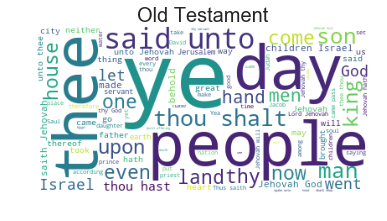

In [21]:
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
text = biblegroup.text[1]
stopwords=set(STOPWORDS)
wordcloud = WordCloud(max_words=100,background_color="white",stopwords=stopwords).generate(text)
plt.title('Old Testament', fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

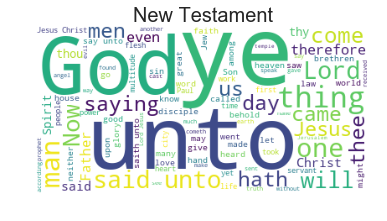

In [22]:
text = biblegroup.text[0]
wordcloud = WordCloud(max_words=100,background_color="white",stopwords=stopwords).generate(text)

plt.title('New Testament',fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The Old Testament cloud has prominent words like people, king, Israel, Jehovah.
The New Testament cloud has prominent words like Lord, Father, Christ and Jesus.

Now combine the text from the 7 sections and create word clouds.

In [24]:
biblesect=bible.groupby(['Sections'])['text'].apply(lambda x: ','.join(x)).reset_index()
biblesect.head(10)

,Sections,text
0,Apostles,"God, having of old time spoken unto the father..."
1,Gospels,"The book of the generation of Jesus Christ, th..."
2,History,Now it came to pass after the death of Moses t...
3,Law,In the beginning God created the heavens and t...
4,Paul,"Paul, a servant of Jesus Christ, called `to be..."
5,Prophets,"The vision of Isaiah the son of Amoz, which he..."
6,Wisdom,"There was a man in the land of Uz, whose name ..."


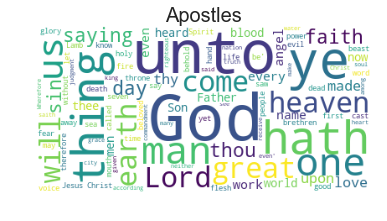

In [25]:
text = biblesect.text[0]
wordcloud = WordCloud(max_words=100,background_color="white",stopwords=stopwords).generate(text)

plt.title('Apostles',fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

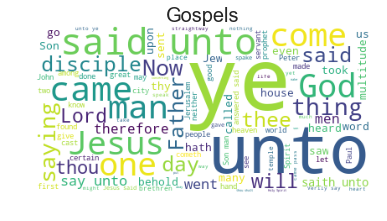

In [26]:
text = biblesect.text[1]
wordcloud = WordCloud(max_words=100,background_color="white", stopwords=stopwords).generate(text)

plt.title('Gospels',fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

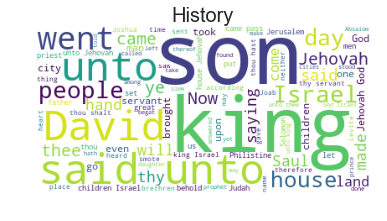

In [27]:
text = biblesect.text[2]
wordcloud = WordCloud(max_words=100,background_color="white",stopwords=stopwords).generate(text)

plt.title('History',fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

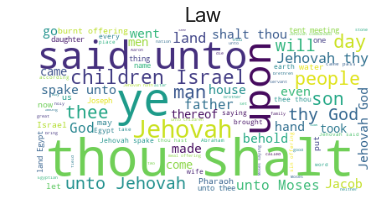

In [28]:
text = biblesect.text[3]
wordcloud = WordCloud(max_words=100,background_color="white",stopwords=stopwords).generate(text)

plt.title('Law',fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Law has 'thou Shalt' as its most prominent words. 

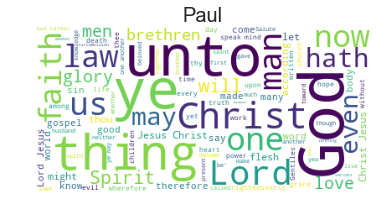

In [29]:
text = biblesect.text[4]
wordcloud = WordCloud(max_words=100,background_color="white",stopwords=stopwords).generate(text)

plt.title('Paul',fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

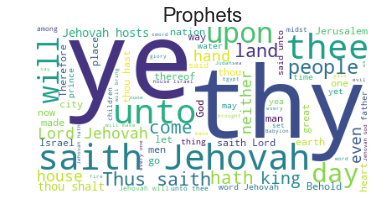

In [30]:
text = biblesect.text[5]
wordcloud = WordCloud(max_words=100,background_color="white",stopwords=stopwords).generate(text)

plt.title('Prophets',fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

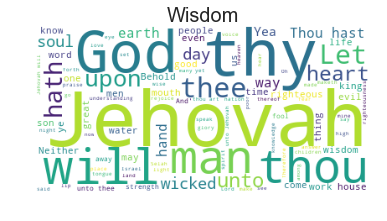

In [31]:
text = biblesect.text[6]
wordcloud = WordCloud(max_words=100,background_color="white",stopwords=stopwords).generate(text)

plt.title('Wisdom',fontsize=20)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### C. How would Seriation Analyses help to reveal the structure of these 66 Books?

I will try an Agglomerative Clustering method on the bible pcs.

In [58]:
from sklearn.cluster import AgglomerativeClustering
biblerankA = AgglomerativeClustering(n_clusters=7,linkage='average',affinity='cosine').fit(pcadf)
biblerankA.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 5, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 4],
      dtype=int64)

In [59]:
biblerankC = AgglomerativeClustering(n_clusters=7,linkage='complete',affinity='cosine').fit(pcadf)
biblerankC.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1, 6, 6, 6, 6, 6,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 3, 0, 4],
      dtype=int64)

In [60]:
bible['ClusterA']=biblerankA.labels_
pd.crosstab(bible.ClusterA,bible.Sections,margins=True)

Sections,Apostles,Gospels,History,Law,Paul,Prophets,Wisdom,All
ClusterA,,,,,,,,
0,6,0,12,5,13,15,5,56
1,0,5,0,0,0,0,0,5
2,1,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1
5,0,0,0,0,0,1,0,1
6,0,0,0,0,0,1,0,1
All,9,5,12,5,13,17,5,66


The agglomerative clustering using average on the pca did not group well.

In [61]:
bible['ClusterC']=biblerankC.labels_
pd.crosstab(bible.ClusterC,bible.Sections,margins=True)

Sections,Apostles,Gospels,History,Law,Paul,Prophets,Wisdom,All
ClusterC,,,,,,,,
0,6,0,12,5,13,11,5,52
1,0,0,0,0,0,4,0,4
2,0,0,0,0,0,2,0,2
3,1,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,1
5,1,0,0,0,0,0,0,1
6,0,5,0,0,0,0,0,5
All,9,5,12,5,13,17,5,66


Complete Agglomerative clustering worked a little bitter than average but still not good.
- Too much overlap
- All 5 Gospel books were placed into one unique cluster.

Attempt clustermaps and dendrograms with vectorized bible data

In [15]:
biblemap=bible5 > 0
biblemap.head()

,aaron,able,abraham,according,afraid,altar,angel,anger,answer,answered,...,wrath,written,ye,ye shall,yea,year,years,years old,young,zion
0,False,True,True,True,True,True,True,True,True,True,...,True,False,True,True,True,True,True,True,True,False
1,True,True,True,True,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,False
2,True,True,True,True,True,True,False,False,False,False,...,True,False,True,True,False,True,True,True,True,False
3,True,True,True,True,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,False,True,True,True,...,True,True,True,True,True,True,True,True,True,False


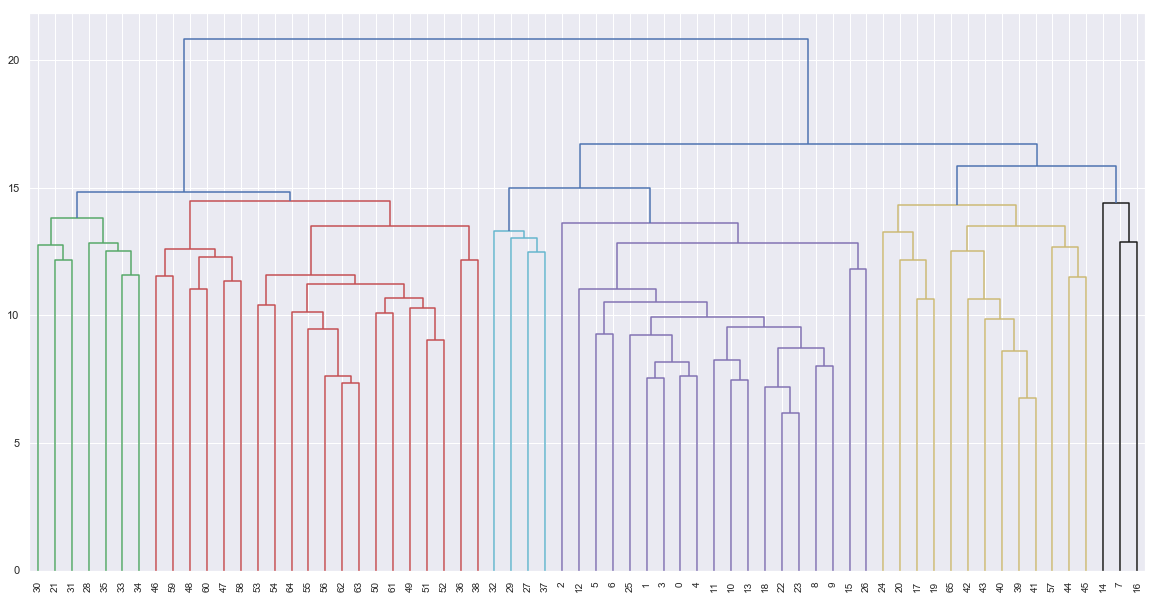

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage

H=linkage (biblemap,'complete')

#ax = plt.gca()
#ax.tick_params(axis='x', which='major', labelsize=50)
#ax.tick_params(axis='y', which='major', labelsize=8)
plt.figure(figsize=(20,10))
dendro=dendrogram(H, leaf_font_size=10)


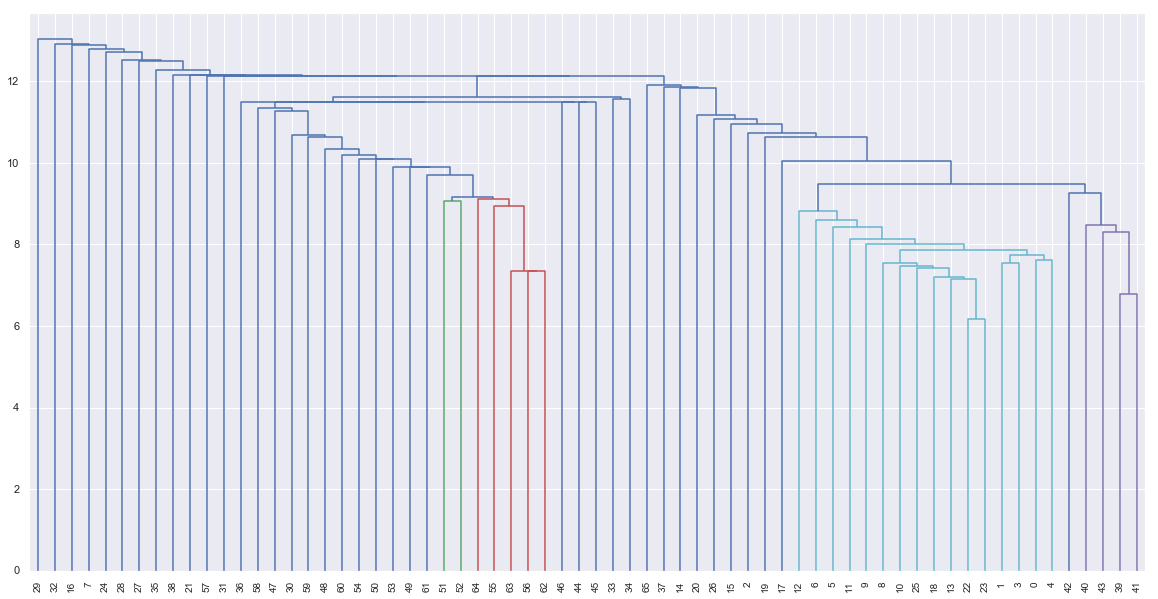

In [37]:
H=linkage (biblemap,'complete')
plt.figure(figsize=(20,10))
dendro=dendrogram(H, leaf_font_size=10)

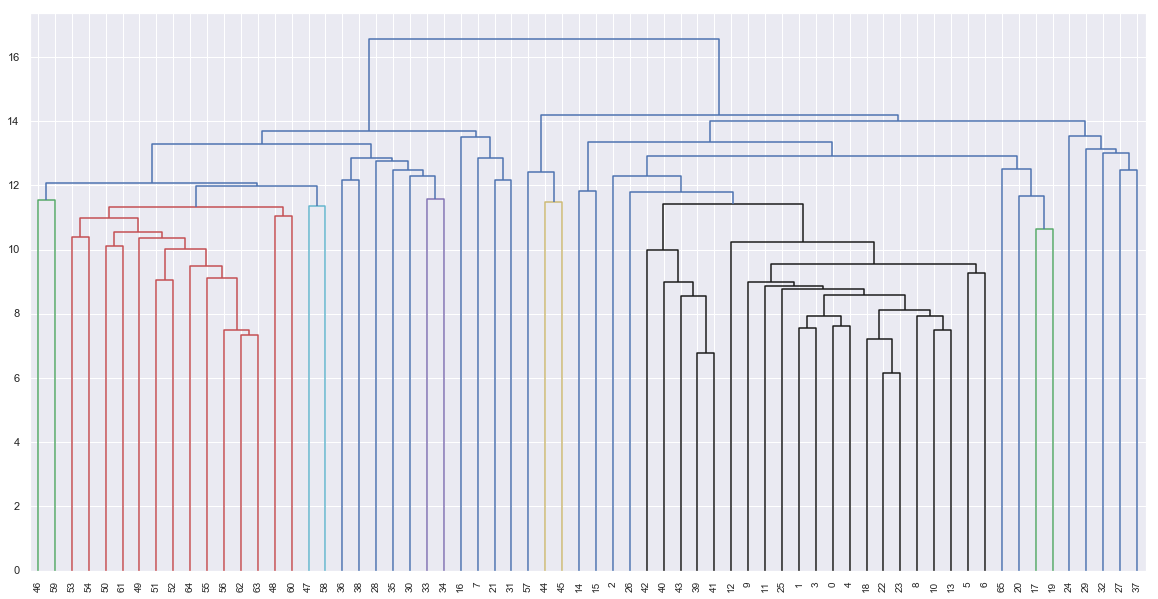

In [38]:
H=linkage (biblemap,'average')
plt.figure(figsize=(20,10))
dendro=dendrogram(H, leaf_font_size=10)

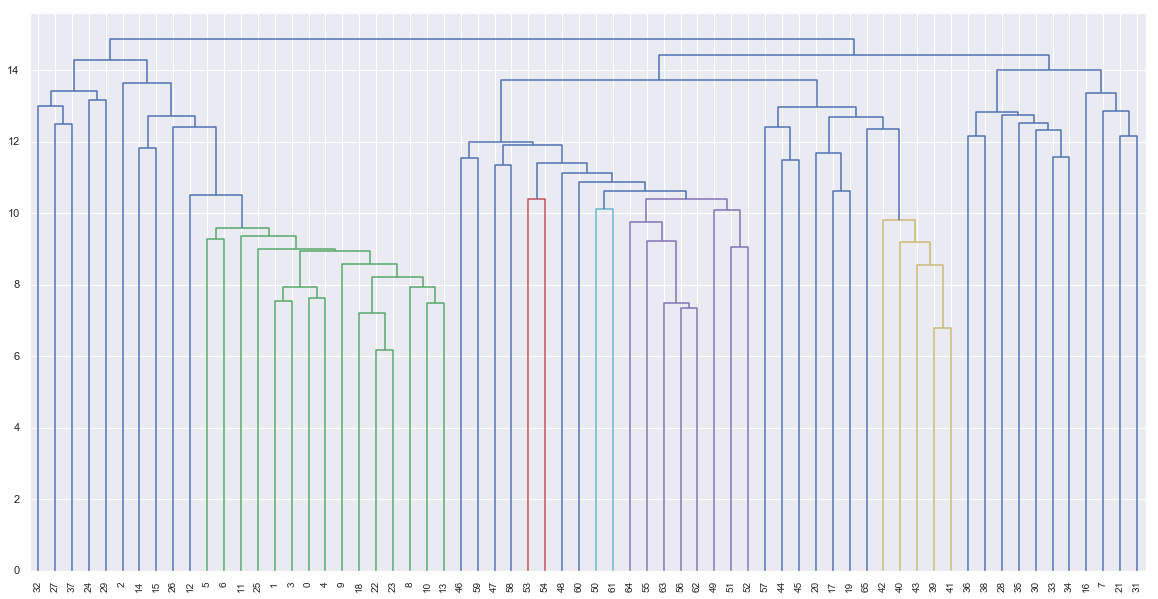

In [39]:
H=linkage (biblemap,'weighted')
plt.figure(figsize=(20,10))
dendro=dendrogram(H, leaf_font_size=10)

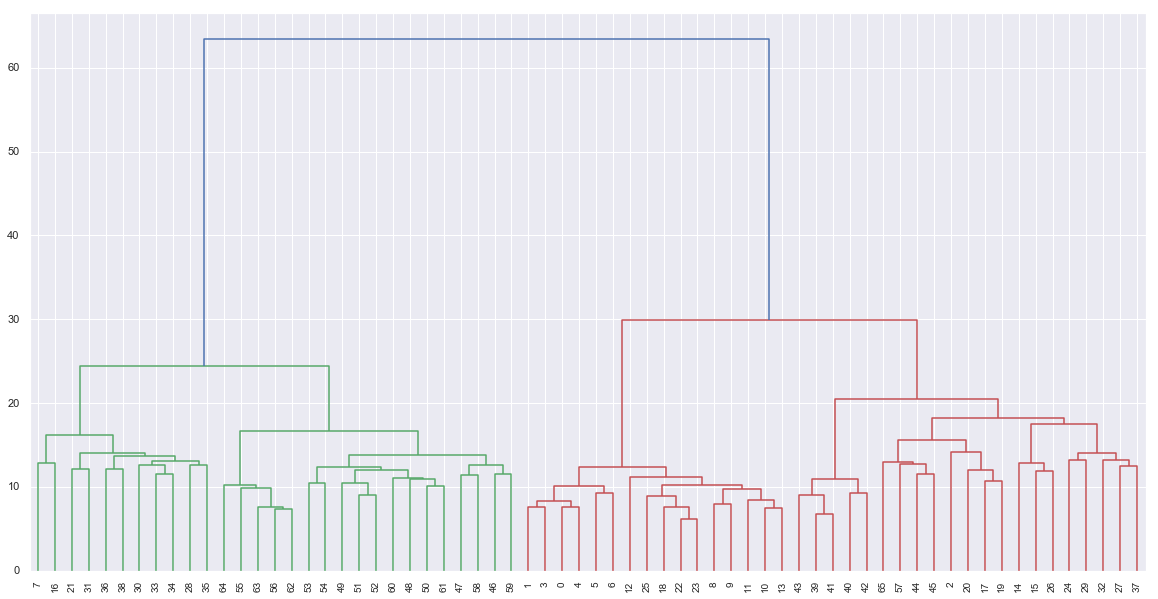

In [40]:
H=linkage (biblemap,'ward')
plt.figure(figsize=(20,10))
dendro=dendrogram(H, leaf_font_size=10)

In [16]:
from scipy.spatial.distance import pdist, squareform
dm=squareform(pdist(mito1))

C:\Users\heid4253\AppData\Local\Continuum\anaconda2\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)
C:\Users\heid4253\AppData\Local\Continuum\anaconda2\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


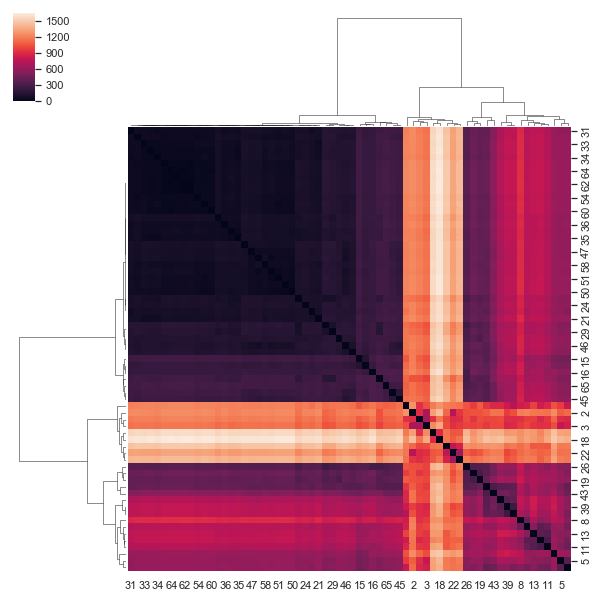

In [22]:
h=sns.clustermap(dm,metric="cosine")

C:\Users\heid4253\AppData\Local\Continuum\anaconda2\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)
C:\Users\heid4253\AppData\Local\Continuum\anaconda2\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


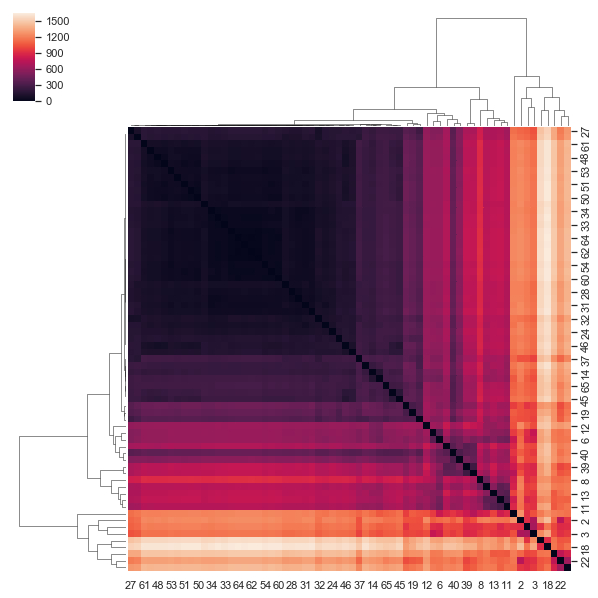

In [17]:
h=sns.clustermap(dm,metric="correlation")

C:\Users\heid4253\AppData\Local\Continuum\anaconda2\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)
C:\Users\heid4253\AppData\Local\Continuum\anaconda2\lib\site-packages\seaborn\matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


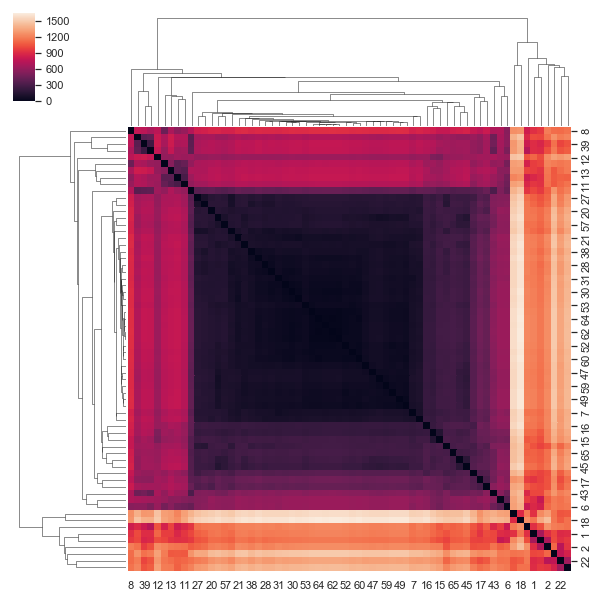

In [18]:
h=sns.clustermap(dm,method="single")